In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
plt.ion()
import yt
from tools import my_field_def, unit_base, subhalo_center, ray_end_from_sph, make_slice, plot_ray_in_slice

yt : [INFO     ] 2018-11-18 05:13:35,228 Setting instrument to Custom


In [14]:
snap_file = '../../2Mpc_LG_convert/snapdir_135/snap_LG_WMAP5_2048_135.0'
snap_num = 135
subfind_path = '../../2Mpc_LG'


ds = yt.frontends.gadget.GadgetDataset(filename=snap_file, unit_base= unit_base,
    field_spec=my_field_def)

mw_center = subhalo_center(subfind_path=subfind_path, snap_num=snap_num,
            subhalo_number = 1)

yt : [INFO     ] 2018-11-18 05:19:25,836 Calculating time from 1.000e+00 to be 4.336e+17 seconds
yt : [INFO     ] 2018-11-18 05:19:25,844 Parameters: current_time              = 4.336488085281229e+17 s
yt : [INFO     ] 2018-11-18 05:19:25,845 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2018-11-18 05:19:25,845 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-11-18 05:19:25,846 Parameters: domain_right_edge         = [64000. 64000. 64000.]
yt : [INFO     ] 2018-11-18 05:19:25,846 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-11-18 05:19:25,847 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2018-11-18 05:19:25,847 Parameters: omega_lambda              = 0.721
yt : [INFO     ] 2018-11-18 05:19:25,847 Parameters: omega_matter              = 0.279
yt : [INFO     ] 2018-11-18 05:19:25,848 Parameters: hubble_constant           = 0.7


## Slices en el plano YX

yt : [INFO     ] 2018-11-18 17:05:38,508 xlim = 31713.013672 33713.013672
yt : [INFO     ] 2018-11-18 17:05:38,579 ylim = 31897.257812 33897.257812
yt : [INFO     ] 2018-11-18 17:05:38,582 xlim = 31713.013672 33713.013672
yt : [INFO     ] 2018-11-18 17:05:38,584 ylim = 31897.257812 33897.257812
yt : [INFO     ] 2018-11-18 17:05:38,588 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



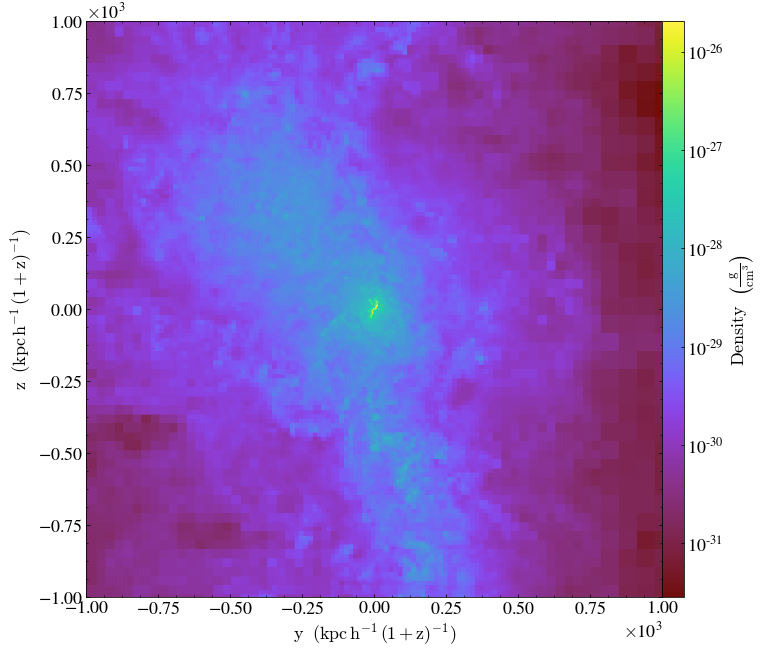

In [43]:
slc = make_slice(ds, mw_center, 2000, 'x')
slc.show()

yt : [INFO     ] 2018-11-18 17:05:40,544 Parameters: current_time              = 4.336488085281229e+17 s
yt : [INFO     ] 2018-11-18 17:05:40,544 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2018-11-18 17:05:40,558 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2018-11-18 17:05:40,559 Parameters: domain_right_edge         = [64000. 64000. 64000.] code_length
yt : [INFO     ] 2018-11-18 17:05:40,559 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-11-18 17:05:40,560 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2018-11-18 17:05:40,560 Parameters: omega_lambda              = 0.721
yt : [INFO     ] 2018-11-18 17:05:40,561 Parameters: omega_matter              = 0.279
yt : [INFO     ] 2018-11-18 17:05:40,561 Parameters: hubble_constant           = 0.7



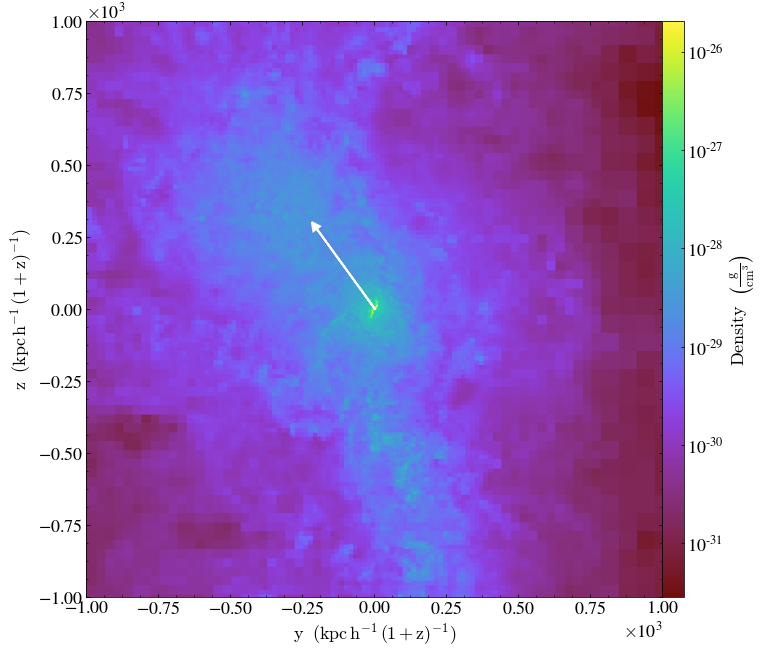

In [44]:
ray_filename = 'rays_2Mpc_LG_from_mw/ray_394_0.70_4.19.h5'
ray = yt.load(ray_filename)

plot_ray_in_slice(slc, ray)

slc.show()

yt : [INFO     ] 2018-11-18 17:05:40,882 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



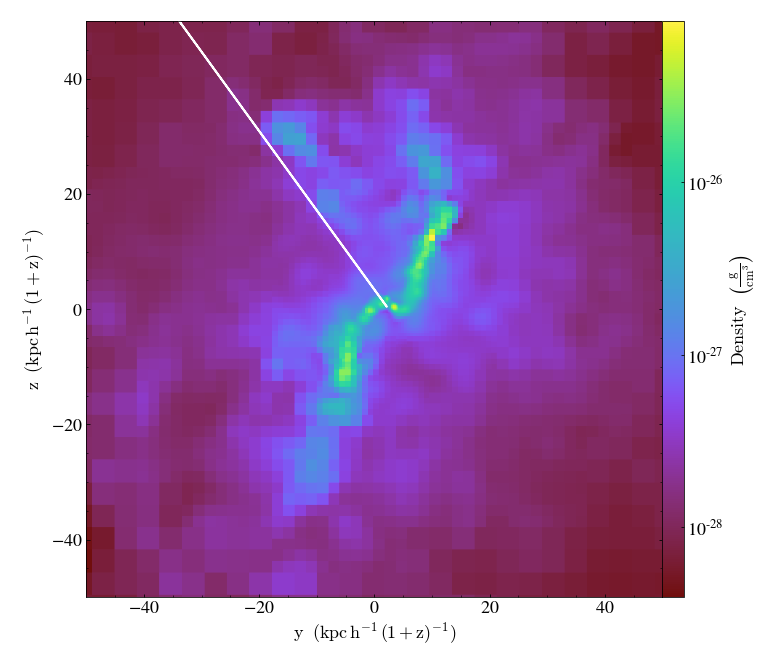

In [45]:
slc.set_width((100, 'kpccm/h'))


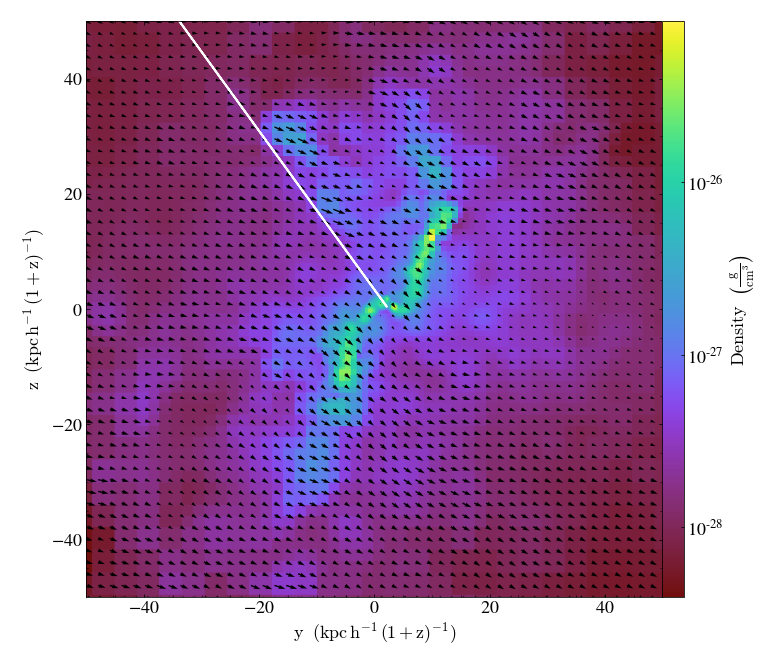

In [46]:
slc.annotate_velocity()

## Slice to M31

In [59]:
ray_toM31_filename = 'rays_2Mpc_LG_from_mw/ray_455_0.70_4.19.h5'
ray_m31 = yt.load(ray_toM31_filename)

yt : [INFO     ] 2018-11-18 17:15:29,030 Parameters: current_time              = 4.336488085281229e+17 s
yt : [INFO     ] 2018-11-18 17:15:29,032 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2018-11-18 17:15:29,035 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2018-11-18 17:15:29,038 Parameters: domain_right_edge         = [64000. 64000. 64000.] code_length
yt : [INFO     ] 2018-11-18 17:15:29,041 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-11-18 17:15:29,042 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2018-11-18 17:15:29,044 Parameters: omega_lambda              = 0.721
yt : [INFO     ] 2018-11-18 17:15:29,045 Parameters: omega_matter              = 0.279
yt : [INFO     ] 2018-11-18 17:15:29,046 Parameters: hubble_constant           = 0.7


In [60]:
theta, phi = ray_toM31_filename.split('_')[-2:]
index = phi.find('.h5')
phi = phi[:index]

theta_m31 = float(theta); phi_m31 = float(phi)

normal_vector_m31 = [np.sin(theta_m31)*np.sin(phi_m31), -np.sin(theta_m31)*np.cos(phi_m31), 0]
north_vector = [0,0,1]

In [61]:
normal_vector

[-0.5582981600783978, 0.32143365256761014, 0]

In [62]:
slc_m31 = yt.SlicePlot(ds, normal = normal_vector_m31, fields='density', center = mw_center.tolist(), width=(2000, 'kpc'),
                   north_vector=north_vector)

yt : [INFO     ] 2018-11-18 17:15:46,795 xlim = -700.000000 700.000000
yt : [INFO     ] 2018-11-18 17:15:46,941 ylim = -700.000000 700.000000
yt : [INFO     ] 2018-11-18 17:15:46,970 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



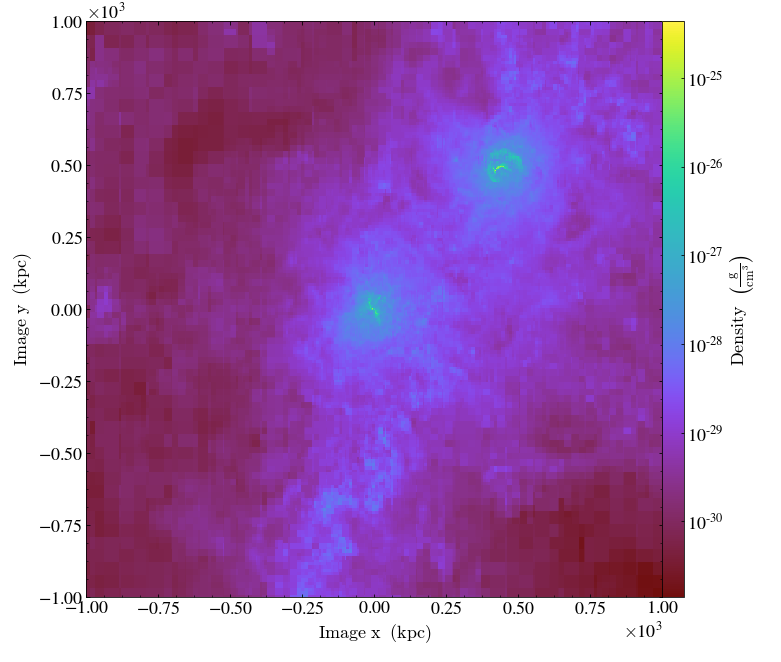

In [63]:
slc_m31.show()


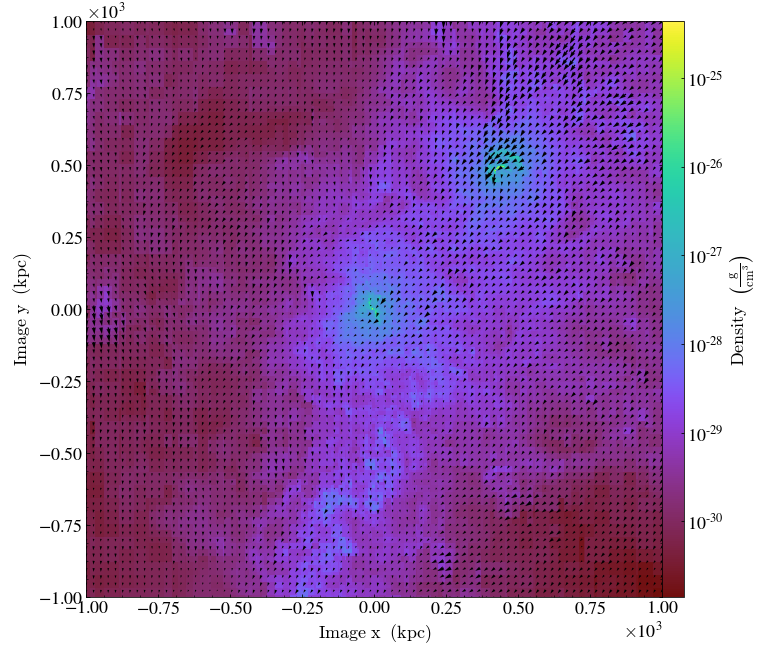

In [64]:
slc_m31.annotate_cquiver('cutting_plane_velocity_x', 'cutting_plane_velocity_y', factor =10)
slc_m31.show()


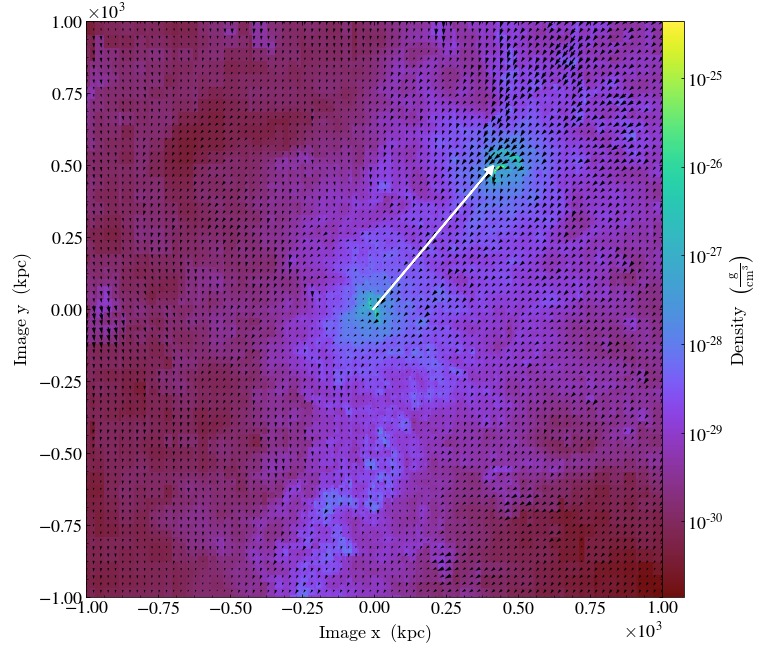

In [65]:
plot_ray_in_slice(slc_m31, ray_m31)

slc_m31.show()

## Ray away

In [66]:
ray_away_filename = 'rays_2Mpc_LG_from_mw/ray_455_1.05_1.40.h5'
ray_away = yt.load(ray_away_filename)

yt : [INFO     ] 2018-11-18 17:16:21,281 Parameters: current_time              = 4.336488085281229e+17 s
yt : [INFO     ] 2018-11-18 17:16:21,282 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2018-11-18 17:16:21,282 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2018-11-18 17:16:21,283 Parameters: domain_right_edge         = [64000. 64000. 64000.] code_length
yt : [INFO     ] 2018-11-18 17:16:21,284 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-11-18 17:16:21,284 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2018-11-18 17:16:21,285 Parameters: omega_lambda              = 0.721
yt : [INFO     ] 2018-11-18 17:16:21,285 Parameters: omega_matter              = 0.279
yt : [INFO     ] 2018-11-18 17:16:21,286 Parameters: hubble_constant           = 0.7


In [67]:
theta, phi = ray_away_filename.split('_')[-2:]
index = phi.find('.h5')
phi = phi[:index]

theta_away = float(theta); phi_away = float(phi)

normal_vector_away = [np.sin(theta_away)*np.sin(phi_away), -np.sin(theta_away)*np.cos(phi_away), 0]
north_vector = [0,0,1]

yt : [INFO     ] 2018-11-18 17:16:33,328 xlim = -700.000000 700.000000
yt : [INFO     ] 2018-11-18 17:16:33,955 ylim = -700.000000 700.000000
yt : [INFO     ] 2018-11-18 17:16:33,985 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



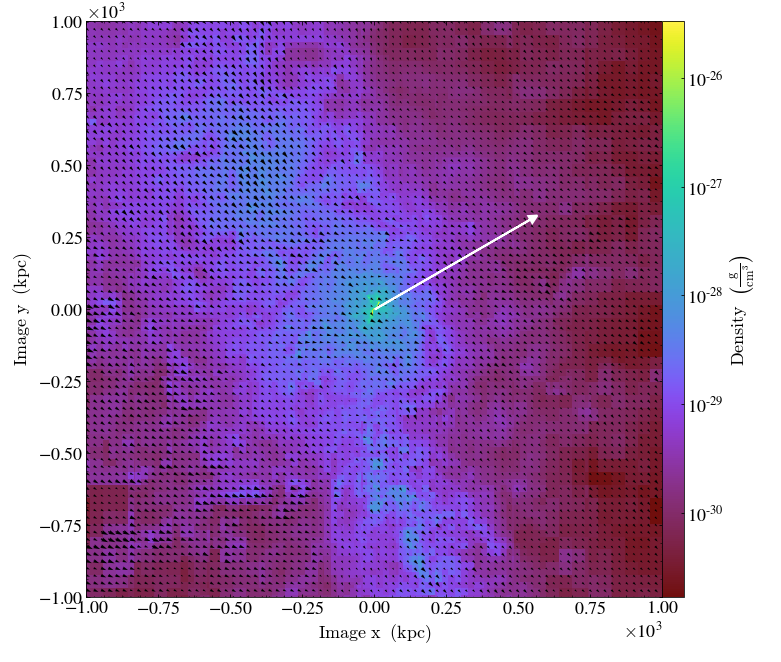

In [68]:
slc_away = yt.SlicePlot(ds, normal = normal_vector_away, fields='density', center = mw_center.tolist(), width=(2000, 'kpc'),
                   north_vector=north_vector)
slc_away.annotate_cquiver('cutting_plane_velocity_x', 'cutting_plane_velocity_y', factor =10)

plot_ray_in_slice(slc_away, ray_away)

slc_away.show()